In [1]:
import sys
sys.path.append('../')

In [3]:
from src.exploratory_data_analysis import gather_data
import pandas as pd
from sklearn.model_selection import train_test_split

# Building the test set

The final step of the model quality investigation includes building test set. 

It was decided that the test set would consist of 300 samples coming from STA data and the observations would be labeled manually.

First we gather the english dataset and collect only valid articles (containing text), which are not schedules (as they are not reliable articles for IPTC categorisation)

In [4]:
df = gather_data('../data/2023_articles_en')
df = df[df['text'] != 'None']
df = df[df['headline'].str.contains('Schedule of events') == False]

We consider 3 methods of sampling for the test set. In each case we set the seed to 42, to provide reproducible data sets. 

## 1. Balanced sampling

Creating a test dataset such that each category has the same number of samples.

In [6]:
strata_column = 'high_label'
unique_categories = df[strata_column].unique()
samples_per_category = 300 // len(unique_categories)
test_balanced = pd.DataFrame()


for category in unique_categories:
    category_samples = df[df[strata_column] == category].sample(samples_per_category, random_state=42)
    test_balanced = pd.concat([test_balanced, category_samples], axis=0)

In [ ]:
test_balanced.to_csv('../data/test_sets/test_set_balanced.csv', index=False)

## 2. Stratified sampling

Creating a test dataset such that each ITPC category has the same proportion of samples as the original dataset. Note, that stratified and balanced sampling are done with regard to the predicted classes (not ground-truth classes), so the results of such sampling might be biased.

In [7]:
strata_column = 'high_label'

total_size = len(df)
test_size = 300 / total_size

train_stratified, test_stratified = train_test_split(df, test_size=test_size, stratify=df[strata_column], random_state=42)


In [ ]:
test_stratified.to_csv('../data/test_sets/test_labeled_set_stratified.csv', index=False)

# 3. Random sampling

We choose the samples randomly, so theoretically the distribution of classes in the test set would imitate the real distribution pf IPTC classes.

In [8]:
train_random, test_random = train_test_split(df, test_size=test_size, random_state=42)

In [10]:
test_random.to_csv('../data/test_sets/test_labeled_set_random.csv', index=False)

We show value counts of IPTC categories in each separate dataset. 

In [9]:
counts_df = pd.DataFrame({'Balanced':test_balanced['high_label'].value_counts(),
                          'Stratified': test_stratified['high_label'].value_counts(),
                          'Random': test_random['high_label'].value_counts()})
counts_df

Balanced  Stratified  Random
arts, culture and entertainment        17          16      12
crime, law and justice                 17          27      33
disaster and accident                  17          22      24
economy, business and finance          17          53      55
education                              17          11      16
environmental issue                    17          14      18
health                                 17          15       7
human interest                         17           3       2
labour                                 17          19      11
lifestyle and leisure                  17           3       2
politics                               17          39      39
religion and belief                    17           2       3
science and technology                 17           6       7
social issue                           17           8       9
sport                                  17          21      24
unrest, conflicts and war              17          13      14
weather                                17          28      24

# Data labeling

To speed up the labour, a python application was built. It allows the user to:
1. View articles along with their headlines
2. See the label predicted by machine learning method (in our case embedding cosine similarity)
3. See the label assigned by annotator
4. Click on one of the IPTC cateogry names (buttons on the right side) to assign the chosen category.

Important note, that in `data/test_sets` folder there are unlabeled test sets. The labeled test set is created inside `labeling_app/labeled_data.csv`

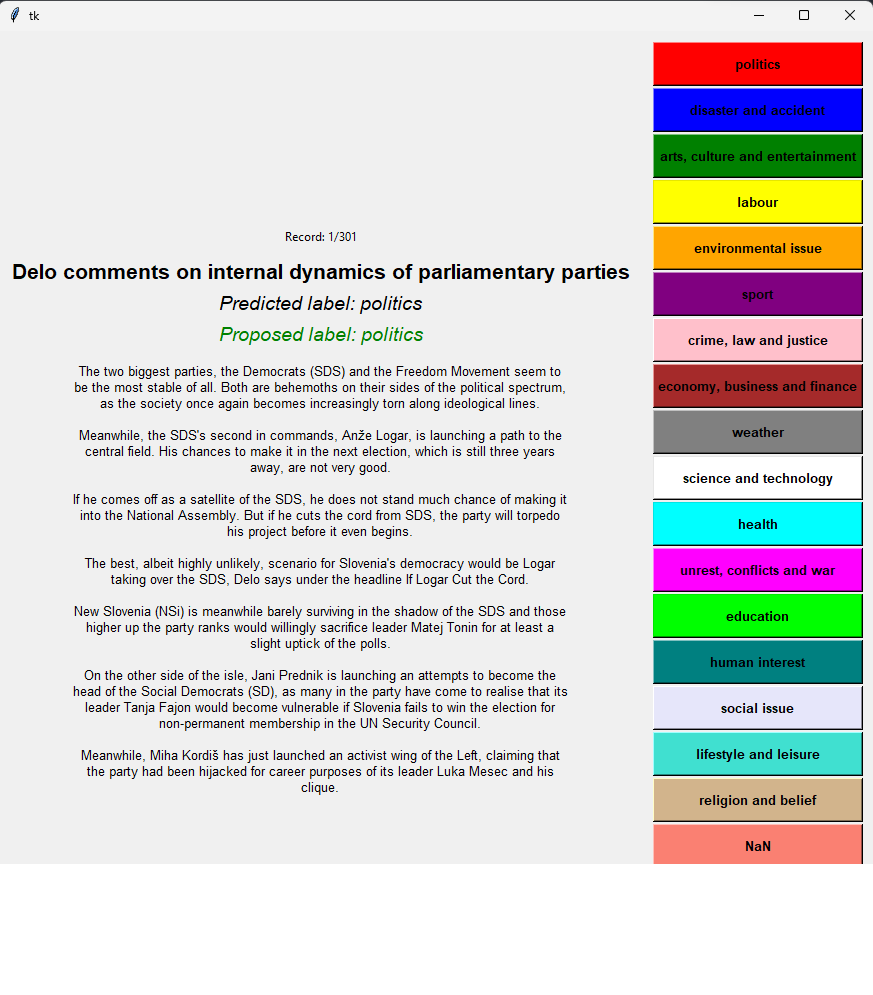

In [ ]:
from IPython import display
display.Image("../static/app.png")

The labeled data looks like this:

In [11]:
labeled_data=pd.read_csv('../labeling_app/labeled_data.csv')
labeled_data.head()

headline  \
0  Delo comments on internal dynamics of parliame...   
1  Voice of the People unhappy with coalition par...   
2               Daily headlines - Tuesday, 29 August   
3  Golob, Bettel agree all EU candidates should b...   
4  Diplomatic charity bazaar in Ljubljana brings ...   

                                                text  \
0  The two biggest parties, the Democrats (SDS) a...   
1  The group held a similar pre-election discussi...   
2  <b>DELO</b>\n\n<b>Floods</b>\n"Three weeks aft...   
3  "Enlargement was a technical issue for 20 year...   
4  Around 60 stands were put in Stritar Street an...   

                        high_label                  label  
0                         politics               politics  
1                         politics               politics  
2            disaster and accident  disaster and accident  
3                         politics               politics  
4  arts, culture and entertainment           social issue